# K Nearest Neighbour Model for User Authentication based on Keystroke Dynamics.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Load and explore data

In [8]:
data = pd.read_csv("KeystrokeData.csv")
data.head()

,User,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return,Target
0,Nikhil,0.119,0.272,0.153,0.103,0.208,0.105,0.103,0.288,0.185,...,0.328,0.225,0.135,0.264,0.129,0.111,0.311,0.200,0.112,Genuine
1,Nikhil,0.119,0.272,0.153,0.103,0.216,0.113,0.103,0.287,0.184,...,0.312,0.209,0.151,0.272,0.121,0.110,0.304,0.194,0.151,Genuine
2,Nikhil,0.127,0.352,0.225,0.143,0.240,0.097,0.143,0.344,0.201,...,0.297,0.154,0.150,0.263,0.113,0.127,0.304,0.177,0.127,Genuine
3,Nikhil,0.122,0.315,0.193,0.127,0.200,0.073,0.111,0.400,0.289,...,0.200,0.089,0.143,0.240,0.097,0.159,0.176,0.017,0.087,Genuine
4,Nikhil,0.143,0.232,0.089,0.119,0.208,0.089,0.127,0.264,0.137,...,0.184,0.041,0.151,0.224,0.073,0.206,0.192,-0.014,0.119,Genuine


In [9]:
data.columns

Index(['User', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i',
       'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five',
       'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r',
       'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a',
       'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return',
       'UD.l.Return', 'H.Return', 'Target'],
      dtype='object')

# Data Visualization

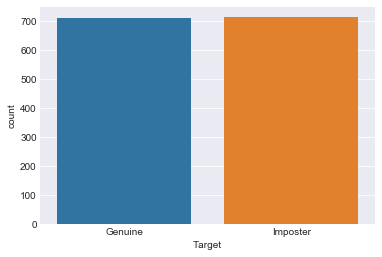

In [35]:
sns.set_style('darkgrid')
sns.countplot(x='Target',data=data)

# Split data into train and test data

In [36]:
train, test = train_test_split(data, test_size = 0.2)
features = list(data.columns[1:32])
X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']

# Train model with training data.

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
y_test.count()

285

# Predict Results

[[139   5]
 [  3 138]]


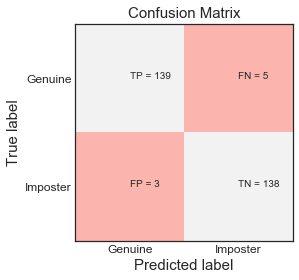

In [14]:
pred = knn.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)
sns.set_style('white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 15)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=12)
plt.yticks(tick_marks, classNames,fontsize=12)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [15]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

    Genuine       0.98      0.97      0.97       144
   Imposter       0.97      0.98      0.97       141

avg / total       0.97      0.97      0.97       285



In [16]:
model_accuracy = metrics.accuracy_score(y_test, pred)
print('Accuracy of Model is : ',model_accuracy)

Accuracy of Model is :  0.9719298245614035


In [17]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

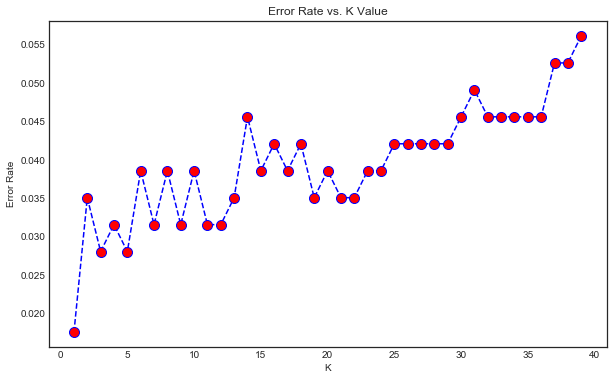

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [19]:
error_rate = []

# Will take some time
for i in range(1,70):
    train, test = train_test_split(data, test_size = 0.2, random_state=i)
    features = list(data.columns[1:32])
    X = data[features]
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

(array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]),
 <a list of 7 Text yticklabel objects>)

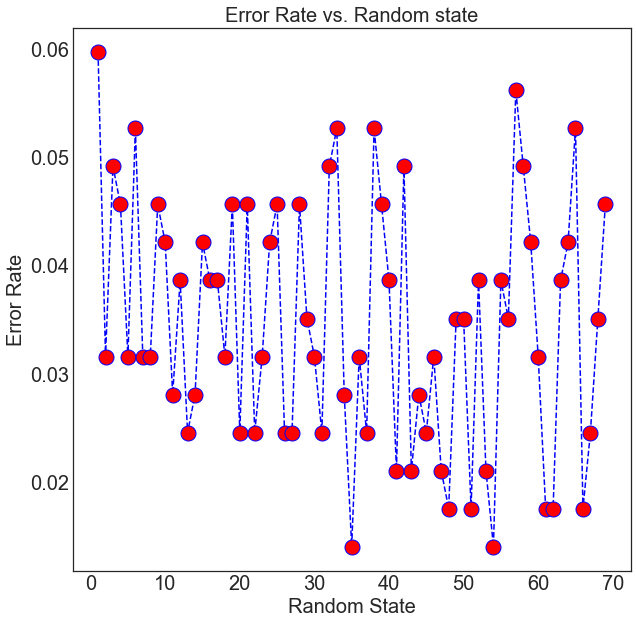

In [20]:
ax =plt.figure(figsize=(10,10))
plt.plot(range(1,70),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=15,)
plt.title('Error Rate vs. Random state',fontsize=20)
plt.xlabel('Random State',fontsize=20)
plt.ylabel('Error Rate',fontsize=20)
# plt.axis([1,70,0.1,])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


In [21]:
plt

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [22]:
C_prange = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
accuracy = []

for i in C_prange:
      
    train, test = train_test_split(data, test_size = i,random_state = 33)
    features = list(data.columns[1:32])
    X = data[features]
    y =data['Target']
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    model_accuracy = metrics.accuracy_score(y_test,pred)
    accuracy.append(model_accuracy)

Text(0,0.5,'Accuracy')

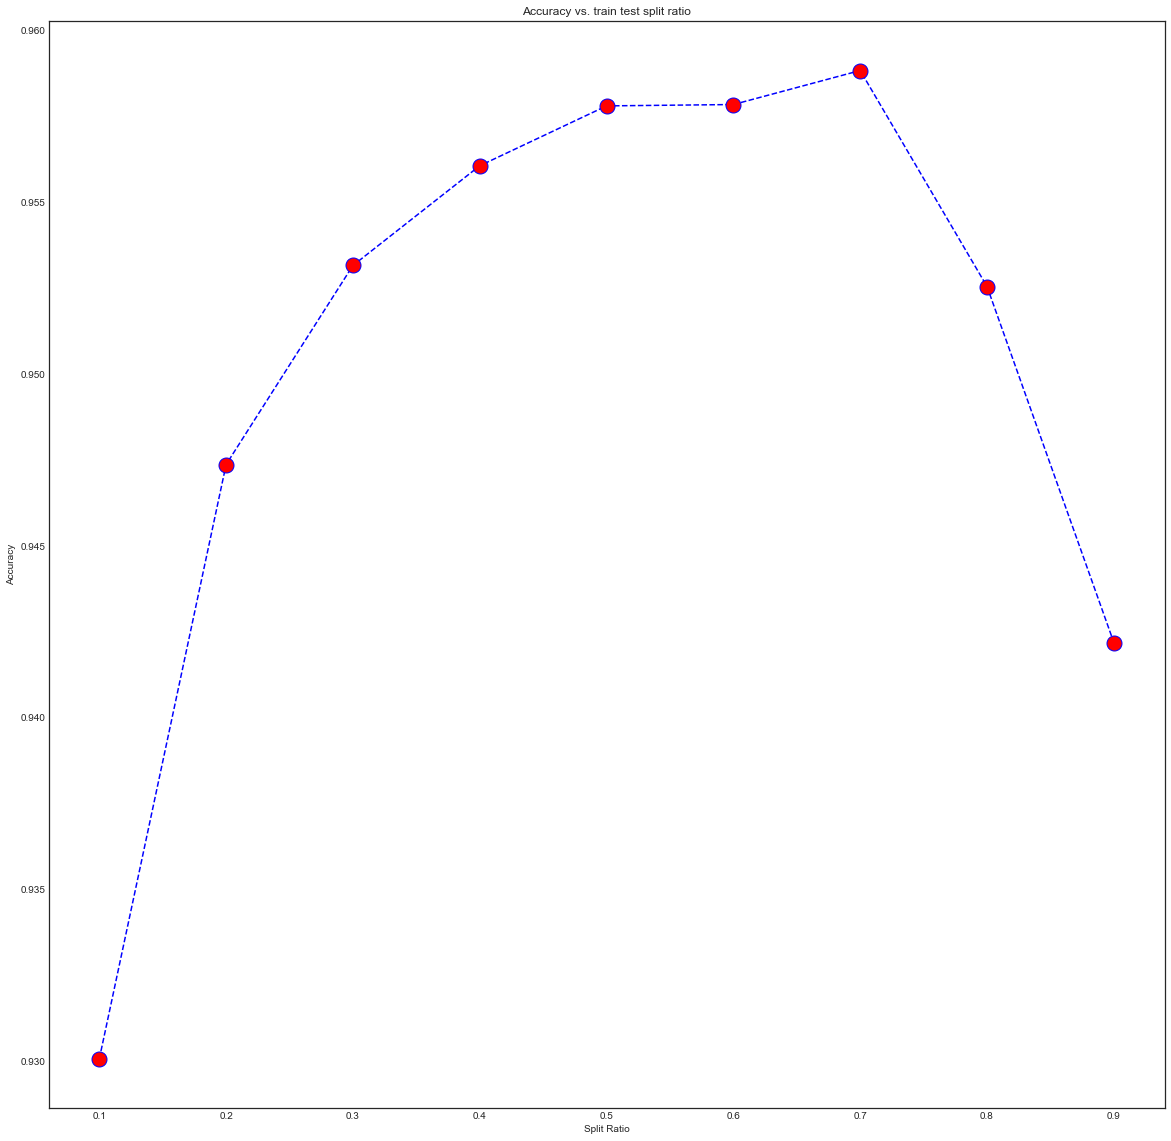

In [23]:
ax =plt.figure(figsize=(20,20))
plt.plot(C_prange,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=15)
plt.title('Accuracy vs. train test split ratio')
plt.xlabel('Split Ratio')
plt.ylabel('Accuracy')

In [31]:
data = pd.read_csv("KeystrokeData.csv")
train, test = train_test_split(data, test_size = 0.2, random_state=35)
features = list(data.columns[1:32])


X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

[[141   1]
 [  3 140]]


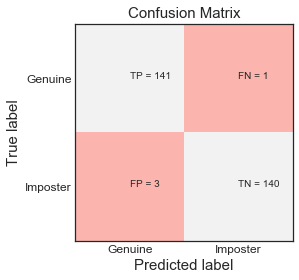

In [32]:
pred = knn.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(confusion_matrix(y_test,pred))
sns.set_style('white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 15)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=12)
plt.yticks(tick_marks, classNames,fontsize=12)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [33]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

    Genuine       0.98      0.99      0.99       142
   Imposter       0.99      0.98      0.99       143

avg / total       0.99      0.99      0.99       285



In [34]:
model_accuracy = metrics.accuracy_score(y_test, pred)
print('Accuracy of Model is : ',model_accuracy)

Accuracy of Model is :  0.9859649122807017


## User Authentication Using Keystroke Dynamics

The unique typing patterns of users can be used as a signature to identify genuine users from imposters. Keystroke signature fuses the simplicity of passwords with increased reliability from biometrics. Unlike other biometrics like IRIS, face, fingerprints etc which need special hardware infrastructure, keystroke biometrics are economical to implement and can be easily integrated into the existing computer security systems. They help augment the existing security infrastructure by being part of a multilevel authentication system. Using Machine learning algorithms, a high accuracy rate in detecting imposters has been demonstrated in this project. The machine learning model is trained with the typing patterns of the subjects. Then it is provided with test data with patterns from the subject as well as from imposters posing as the subject. The model demonstrates the ability to discern genuine users from imposters based on the test pattern’s similarity to the trained model for the subject.

### Data Collection
**There was't any dataset present of keystroke patterns so build standalone desktop application to collect keystrokes from users. The create a typing pattern used calculated 3 different type of timings
for each key pressed.**
  * **Hold time** – time between press and  release of a key.
  * **Keydown-Keydown time** – time between the pressing of consecutive keys.
  * **Keyup-Keydown time** – time between the release of one key and the press of next key.
  <img src = "Images/Keytimings.png">
  
  <img src = "http://g.recordit.co/B6qfWgeBup.gif" >
  
  **Follwed above procedure and collected data from 15 different users**
### Feature selection
For the password typed for each key pressed measured hold time, Keydown-Keydown time,Keyup-Keydown time in milliseconds and this were considered as features.

 <img src= "Images/Data.png">
 
### Training Machine Learning Models.
As the problem is classification of user whether the user is genuine or imposter, supervised learning algorithms like logistic regression, support vector machine and K-nearest-neighbour were used.Used sklearn libraries for training the models.

### Test & evaluate the ML Model
* Train Test Split, where the dataset is divided into two different datasets, training set and testing set.Train the data with training set and test the data on testing set and evaluate the accuracy of the model
* Cross Validation: Split dataset into K equal partitions(folds), Use partition 1 as testing set and remaining K-1 partitions as training set and calculate accuracy. Repeat the process K number of times and use average of all the accuracies to evaluate model performance.

### Results
<img src="Images/Result.png">

<img src= "Images/Confusion.png">